### Instrucciones generales <a class="tocSkip"></a>
1. Forme un grupo de **máximo dos estudiantes**
1. Copie este notebook y **modifique el nombre de archivo** agregando los apellidos de ambos miembros. Por ejemplo si los miembros del grupo son Pablo Huijse y Ana Nuñez el nombre sería: `info147_tarea1_huijse_nuñez.ipynb`
1. Versione su trabajo usando un **repositorio privado de github**. Agregue a su compañero y a su profesor (usuario github: phuijse) en la pestaña Puede agregar a su compañero en la pestaña *Settings/Manage access*
1. Sean leales y honestos, no copie los resultados de otros grupos, el único afectado es usted
1. Entregue el notebook con sus respuestas antes del plazo final al correo: phuijse@inf.uach.cl

# Tarea 1: Explorando datos mundiales de COVID-19 <a class="tocSkip"></a>

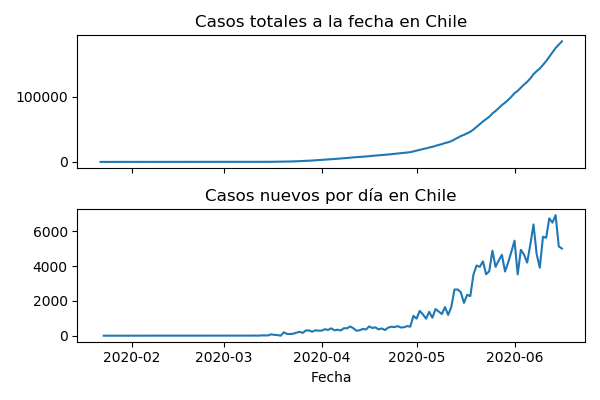


En esta actividad exploraremos la [base de datos de COVID-19 mantenida por la universidad John Hopkins](https://github.com/CSSEGISandData/COVID-19)

Utilice la versión con datos al 16 de Junio que se encuentra adjunto a este notebook en el archivo `data.zip`

Luego de descomprimir deberían observar cuatro archivos

Cada fila de estos archivos corresponde a un país y una región en particular con su latitud, longitud y una serie de tiempo de:

- `covid19_confirmados.csv` : Número de casos totales reportados como COVID-19 positivos
- `covid19_recuperados.csv` : Número de casos totales reportados como recuperados (podría ser considerablemente al valor real)
- `covid19_muertes.csv` : Número de decesos totales por COVID-19

El cuarto archivo `población_mundial.csv` contiene la población por país al 2020 más otros indicadores



> En cada sección de este cuadernillo encontrará instrucciones y preguntas

> Lea cuidadosamente los enunciados y complete con sus respuestas y resultados

> Escriba las rutinas de Python necesarias para resolver los problemas de cada punto. Use las librerías vistas en el curso, se evaluará el resultado pero también la eficiencia de su solución

In [165]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
display("Versión de pandas "+pd.__version__)

'Versión de pandas 1.0.5'

## Preparación de datos (1.5pt)

### Análisis preliminar

Considere el archivo `covid19_confirmados.csv` y conteste

- Use `head` para mostrar las tres primeras filas
- Use `cat` y `wc` para contar el número de filas del archivo
- Responda ¿A que corresponden las filas y columnas?  
- Responda ¿Qué tipo es más adecuado para cada columna?

In [166]:
!head -n 3 covid19_confirmados.csv 

'head' is not recognized as an internal or external command,
operable program or batch file.


In [167]:
!cat covid19_confirmados.csv

'cat' is not recognized as an internal or external command,
operable program or batch file.


In [168]:
!cat covid19_confirmados.csv | wc

'cat' is not recognized as an internal or external command,
operable program or batch file.


## ¿A que corresponde las filas y columnas?

Con el uso de los comando bash, hemos concluido  que las filas corresponden a la lista de paises del mundo con contagios de covid-19 y las columnas corresponden a la cantidad de casos confirmados en las Probincias, estado o ciudad y la region(con la latitud y longitud de esta) de cada uno de los paises listados.

## ¿Que tipo es mas adecuado para cada columna?

en las primeras 2 columnas como se trabaja con nombres de ciudad,estados o provincias es mas adecuado trabajar con string, en cambio en la ultima columna (region,lat,long) se podria trabjar con string como con float, para esto se podria usar una clase, que contenga el nombre de la region (string) y la latitud y longitud (float) especifica de donde se encuentra el caso confimado.

### Cree un primer DataFrame a partir de `covid19_confirmados.csv` 

1. Utilize el nombre de pais como índice principal
1. Elimine las columnas `Lat` y `Long`
1. Use TimeStamps para los "nombres de columna" asociados a fechas
1. Reduzca la columna `Province/State`, el DataFrame resultante debe tener los totales a nivel país

### Cree un segundo DataFrame a partir `poblacion_mundial.csv`

1. Utilice el nombre de pais como índice principal
1. Elimina todas las columnas excepto `Population`

### Haga un `merge` de ambos DataFrames
1. Asigne un valor de `Population` a los elementos de primer DataFrame
1. Descarte las filas que no recibieron un valor de población

<h3><center>Para los casos confirmados</center></h3>

In [169]:
#se creara el DataFrame para covid19_confirmados.csv cuyo indice sera Country/region
data_covid19_confirmados = pd.read_csv('covid19_confirmados.csv', index_col = 'Country/Region')
#se eliminara la columna Lat y Long
data_covid19_confirmados.drop(['Lat','Long'],axis='columns', inplace=True)
#se reducira la columna Province/State al total de casos confirmados a nivel del pais
data_covid19_confirmados['Province/State'] = data_covid19_confirmados['6/16/20']
#se cambiara el nombre de la columna Province/State por Total
data_covid19_confirmados.rename(columns={'Province/State':'Total'}, inplace=True)
#veremos si hay elementos repetidos
data_covid19_confirmados.index.duplicated().sum() # hay 78 elementos repetidos
data_covid19_confirmados = data_covid19_confirmados.groupby(data_covid19_confirmados.index).sum() # con esto agrupamos el dataframe por el nombre y sumamos los elementos repetidos
data_covid19_confirmados

,Total,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,26310,0,0,0,0,0,0,0,0,0,...,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310
Albania,1672,0,0,0,0,0,0,0,0,0,...,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672
Algeria,11147,0,0,0,0,0,0,0,0,0,...,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147
Andorra,854,0,0,0,0,0,0,0,0,0,...,852,852,852,852,852,853,853,853,853,854
Angola,148,0,0,0,0,0,0,0,0,0,...,91,92,96,113,118,130,138,140,142,148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,514,0,0,0,0,0,0,0,0,0,...,472,473,481,485,487,489,489,492,505,514
Western Sahara,9,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,9
Yemen,885,0,0,0,0,0,0,0,0,0,...,484,496,524,560,591,632,705,728,844,885


In [170]:
#Cree un segundo DataFrame a partir poblacion_mundial.csv
data_poblacion_mundial = pd.read_csv('poblacion_mundial.csv', index_col = 'Country')
data_poblacion_mundial.index.duplicated().sum() # hay 0 elementos repetidos
data_poblacion_mundial.drop(data_poblacion_mundial.columns[[1,2,3,4,5,6,7,8,9]], axis='columns', inplace=True)
data_poblacion_mundial

,Population
Country,
China,1438207241
India,1377233523
US,330610570
Indonesia,272931713
Pakistan,219992900
...,...
Montserrat,4991
Falkland Islands,3458
Niue,1624


In [171]:
#Haga un merge de ambos DataFrames

df_covidconf_mundial = pd.merge(data_covid19_confirmados, data_poblacion_mundial, left_on= data_covid19_confirmados.index, right_on=data_poblacion_mundial.index)
df_covidconf_mundial.rename(columns={'key_0':'Country'}, inplace=True)
df_covidconf_mundial.set_index(df_covidconf_mundial.columns[0], inplace=True)
df_covidconf_mundial[df_covidconf_mundial.Population == 0] # esto nos dice que todas las filas tienen poblacion
df_covidconf_mundial


,Total,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,Population
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,26310,0,0,0,0,0,0,0,0,0,...,20917,21459,22142,22890,23546,24102,24766,25527,26310,38742911
Albania,1672,0,0,0,0,0,0,0,0,0,...,1263,1299,1341,1385,1416,1464,1521,1590,1672,2878420
Algeria,11147,0,0,0,0,0,0,0,0,0,...,10265,10382,10484,10589,10698,10810,10919,11031,11147,43685618
Andorra,854,0,0,0,0,0,0,0,0,0,...,852,852,852,852,853,853,853,853,854,77240
Angola,148,0,0,0,0,0,0,0,0,0,...,92,96,113,118,130,138,140,142,148,32644783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,334,0,2,2,2,2,2,2,2,2,...,332,332,332,332,333,334,334,334,334,97160127
Western Sahara,9,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,594215
Yemen,885,0,0,0,0,0,0,0,0,0,...,496,524,560,591,632,705,728,844,885,29687214


<h3><center>Para los casos Recuperados</center></h3>


In [172]:
#se creara el DataFrame para covid19_recuperados.csv cuyo indice sera Country/region
data_covid19_recuperados = pd.read_csv('covid19_recuperados.csv', index_col = 'Country/Region')
#se eliminara la columna Lat y Long
data_covid19_recuperados.drop(['Lat','Long'],axis='columns', inplace=True)
#se reducira la columna Province/State al total de casos recuperados a nivel del pais
data_covid19_recuperados['Province/State'] = data_covid19_recuperados['6/16/20']
#se cambiara el nombre de la columna Province/State por Total
data_covid19_recuperados.rename(columns={'Province/State':'Total'}, inplace=True)
#veremos si hay elementos repetidos
data_covid19_recuperados.index.duplicated().sum() # hay 65 elementos repetidos
data_covid19_recuperados = data_covid19_recuperados.groupby(data_covid19_recuperados.index).sum() # con esto agrupamos el dataframe por el nombre y sumamos los elementos repetidos
data_covid19_recuperados

,Total,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,5508,0,0,0,0,0,0,0,0,0,...,1875,2171,2651,3013,3326,3928,4201,4725,5164,5508
Albania,1064,0,0,0,0,0,0,0,0,0,...,938,945,960,980,1001,1034,1039,1044,1055,1064
Algeria,7842,0,0,0,0,0,0,0,0,0,...,6717,6799,6951,7074,7255,7322,7420,7606,7735,7842
Andorra,789,0,0,0,0,0,0,0,0,0,...,744,751,757,759,780,781,781,781,789,789
Angola,64,0,0,0,0,0,0,0,0,0,...,24,38,38,40,41,42,61,61,64,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,415,0,0,0,0,0,0,0,0,0,...,403,404,404,410,410,414,415,415,415,415
Western Sahara,8,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,8,8,8,8
Yemen,91,0,0,0,0,0,0,0,0,0,...,23,23,23,23,23,28,39,53,79,91


In [173]:
#Haga un merge de ambos DataFrames

df_covidrecu_mundial = pd.merge(data_covid19_recuperados, data_poblacion_mundial, left_on= data_covid19_recuperados.index, right_on=data_poblacion_mundial.index)
df_covidrecu_mundial.rename(columns={'key_0':'Country'}, inplace=True)
df_covidrecu_mundial.set_index(df_covidrecu_mundial.columns[0], inplace=True)
df_covidrecu_mundial[df_covidrecu_mundial.Population == 0] # esto nos dice que todas las filas tienen poblacion
df_covidrecu_mundial


,Total,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,Population
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,5508,0,0,0,0,0,0,0,0,0,...,2171,2651,3013,3326,3928,4201,4725,5164,5508,38742911
Albania,1064,0,0,0,0,0,0,0,0,0,...,945,960,980,1001,1034,1039,1044,1055,1064,2878420
Algeria,7842,0,0,0,0,0,0,0,0,0,...,6799,6951,7074,7255,7322,7420,7606,7735,7842,43685618
Andorra,789,0,0,0,0,0,0,0,0,0,...,751,757,759,780,781,781,781,789,789,77240
Angola,64,0,0,0,0,0,0,0,0,0,...,38,38,40,41,42,61,61,64,64,32644783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,325,0,0,0,0,0,0,0,0,0,...,316,316,320,321,323,323,323,323,325,97160127
Western Sahara,8,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,8,8,8,8,594215
Yemen,91,0,0,0,0,0,0,0,0,0,...,23,23,23,23,28,39,53,79,91,29687214


<h3><center>Para los casos de Muertes</center></h3>

In [174]:
#se creara el DataFrame para covid19_recuperados.csv cuyo indice sera Country/region
data_covid19_muertes = pd.read_csv('covid19_muertes.csv', index_col = 'Country/Region')
#se eliminara la columna Lat y Long
data_covid19_muertes.drop(['Lat','Long'],axis='columns', inplace=True)
#se reducira la columna Province/State al total de casos de muertes a nivel pais
data_covid19_muertes['Province/State'] = data_covid19_muertes['6/16/20']
#se cambiara el nombre de la columna Province/State por Total
data_covid19_muertes.rename(columns={'Province/State':'Total'}, inplace=True)
#veremos si hay elementos repetidos
data_covid19_muertes.index.duplicated().sum() # hay 78 elementos repetidos
data_covid19_muertes = data_covid19_muertes.groupby(data_covid19_muertes.index).sum() # con esto agrupamos el dataframe por el nombre y sumamos los elementos repetidos
data_covid19_muertes

,Total,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,491,0,0,0,0,0,0,0,0,0,...,357,369,384,405,426,446,451,471,478,491
Albania,37,0,0,0,0,0,0,0,0,0,...,34,34,34,34,35,36,36,36,36,37
Algeria,788,0,0,0,0,0,0,0,0,0,...,707,715,724,732,741,751,760,767,777,788
Andorra,52,0,0,0,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,52
Angola,6,0,0,0,0,0,0,0,0,0,...,4,4,4,4,5,5,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,3,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
Western Sahara,1,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Yemen,214,0,0,0,0,0,0,0,0,0,...,112,112,127,129,136,139,160,164,208,214


In [175]:
#Haga un merge de ambos DataFrames

df_covidmuerte_mundial = pd.merge(data_covid19_muertes, data_poblacion_mundial, left_on= data_covid19_muertes.index, right_on=data_poblacion_mundial.index)
df_covidmuerte_mundial.rename(columns={'key_0':'Country'}, inplace=True)
df_covidmuerte_mundial.set_index(df_covidmuerte_mundial.columns[0], inplace=True)
df_covidmuerte_mundial[df_covidmuerte_mundial.Population == 0] # esto nos dice que todas las filas tienen poblacion
df_covidmuerte_mundial


,Total,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,Population
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,491,0,0,0,0,0,0,0,0,0,...,369,384,405,426,446,451,471,478,491,38742911
Albania,37,0,0,0,0,0,0,0,0,0,...,34,34,34,35,36,36,36,36,37,2878420
Algeria,788,0,0,0,0,0,0,0,0,0,...,715,724,732,741,751,760,767,777,788,43685618
Andorra,52,0,0,0,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,52,77240
Angola,6,0,0,0,0,0,0,0,0,0,...,4,4,4,5,5,6,6,6,6,32644783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,97160127
Western Sahara,1,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,594215
Yemen,214,0,0,0,0,0,0,0,0,0,...,112,127,129,136,139,160,164,208,214,29687214


## Análisis global (2pt)

Calcule la cantidad total mundial a la fecha (16 de Junio) de los casos 
- confirmados
- cerrados: recuperados + decesos
- activos: confirmados - cerrados

 ***Calculo de los casos totales de personas con covid confirmados, recuperadas, muertas**

In [176]:
total_confirmados = df_covidconf_mundial['6/16/20'].sum()
total_recuperados = df_covidrecu_mundial['6/16/20'].sum()
total_muertes = df_covidmuerte_mundial['6/16/20'].sum()


al tener estos valores podemos calculas los casos cerrados y activos

In [177]:
total_cerrados = total_recuperados + total_muertes
total_activos = total_confirmados - total_cerrados
#luego los casos son
print('casos confirmados: ',total_confirmados)
print('casos cerrados: ',total_cerrados)
print('casos activos: ',total_activos)

casos confirmados:  8154452
casos cerrados:  4385993
casos activos:  3768459


En base a estas cantidades calcule el porcentaje de 
- casos activos con respecto al total de confirmados
- decesos con respecto al total de casos cerrados
- recuperados con respecto al total de casos cerrados


In [178]:
#Porcentaje casos activos con respecto al total de confirmados
porcentaje_activos = total_activos/total_confirmados
#Porcentaje decesos con respecto al total de casos cerrados
porcentaje_decesos = total_muertes / total_cerrados 
#Porcentaje recuperados con respecto al total de casos cerrados
porcentaje_recuperados = total_recuperados / total_cerrados
print('porcentaje activos con respecto al total de casos confirmados: ',porcentaje_activos*100)
print('porcentaje decesos con respecto al total de casos cerrados: ',porcentaje_decesos*100)
print('porcentaje recuperados con respecto al total de casos cerrados: ',porcentaje_recuperados*100)

porcentaje activos con respecto al total de casos confirmados:  46.21351624854742
porcentaje decesos con respecto al total de casos cerrados:  10.105784482556174
porcentaje recuperados con respecto al total de casos cerrados:  89.89421551744383


Muestre gráficas a nivel mundial de
- la cantidad de **casos confirmados nuevos** por día
- la cantidad de **recuperados nuevos** por día
- la cantidad de **decesos nuevos** por día

<IPython.core.display.Javascript object>


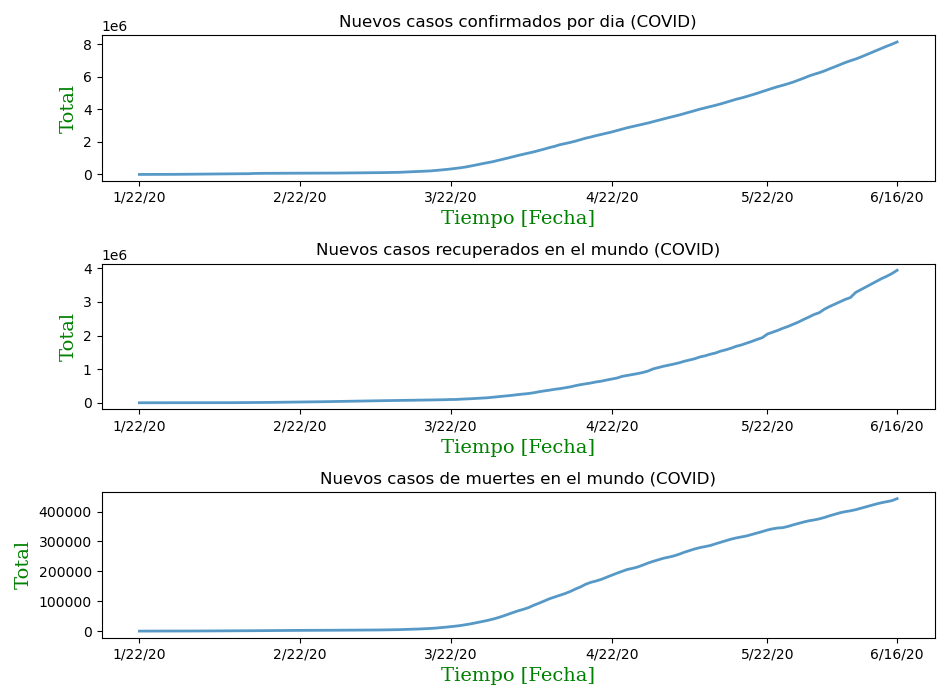

In [179]:
fig, ax = plt.subplots(nrows= 3 ,ncols = 1,figsize=(9.5, 7), tight_layout=True, facecolor='w');
ax[0].cla()
ax[1].cla()
ax[2].cla()
ax[0].plot(df_covidconf_mundial[df_covidconf_mundial.columns[1:-1]].sum() , linewidth=2, alpha=0.75);
ax[0].set_title('Nuevos casos confirmados por dia (COVID)');
ax[0].set_xlabel('Tiempo [Fecha]', fontsize=14, fontname='serif', color="green");
ax[0].set_ylabel('Total', fontsize=14, fontname='serif', color="green");
ax[0].set_xticks(['1/22/20','2/22/20','3/22/20','4/22/20','5/22/20','6/16/20']);
ax[1].plot(df_covidrecu_mundial[df_covidrecu_mundial.columns[1:-1]].sum() , linewidth=2, alpha=0.75);
ax[1].set_title('Nuevos casos recuperados en el mundo (COVID)');
ax[1].set_xlabel('Tiempo [Fecha]', fontsize=14, fontname='serif', color="green");
ax[1].set_ylabel('Total', fontsize=14, fontname='serif', color="green");
ax[2].plot(df_covidmuerte_mundial[df_covidmuerte_mundial.columns[1:-1]].sum() , linewidth=2, alpha=0.75);
ax[1].set_xticks(['1/22/20','2/22/20','3/22/20','4/22/20','5/22/20','6/16/20']);
ax[2].set_title('Nuevos casos de muertes en el mundo (COVID)');
ax[2].set_xlabel('Tiempo [Fecha]', fontsize=14, fontname='serif', color="green");
ax[2].set_ylabel('Total', fontsize=14, fontname='serif', color="green");
ax[2].set_xticks(['1/22/20','2/22/20','3/22/20','4/22/20','5/22/20','6/16/20']);

Encuentre y muestre los nombres y los valores de los 5 paises que a la fecha tienen
- La mayor tasa de incidencia (confirmados por 100.000 dividido población)
- La menor tasa de incidencia 
- La mayor tasa de recuperación (recuperados por 100.000 dividido población)
- La menor tasa de recuperación 
- La mayor tasa de mortalidad (decesos por 100.000 divido población)
- La menor tasa de mortalidad 

¿En qué lugar se encuentra Chile con respecto a cada una de estas métricas? ¿A qué paises se parece más? Discuta y comente sobre sus hallazgos

In [180]:
# 5 Mayores y menores tasas de incidencias
tasa_incidencia = ((df_covidconf_mundial['Total']/df_covidconf_mundial['Population'])* 100000)
tasa_incidencia = tasa_incidencia.sort_values(0)
pais_mayores_incidencia = tasa_incidencia.tail(5)
pais_menores_incidencia = tasa_incidencia.head(5)
print('Pais con mayores tasa de incidencia: \n', pais_mayores_incidencia)
print('\n')
print('Pais con menores tasas de incidencia: \n',pais_menores_incidencia)


Pais con mayores tasa de incidencia: 
 Country
Andorra       1105.644744
Bahrain       1157.921604
Holy See      1498.127341
San Marino    2046.171536
Qatar         2858.907348
dtype: float64


Pais con menores tasas de incidencia: 
 Country
Papua New Guinea    0.089771
Lesotho             0.187021
Laos                0.261935
Vietnam             0.343762
Angola              0.453365
dtype: float64


In [181]:
# 5 Mayores y menores tasas de recuperacion
tasa_recu = ((df_covidrecu_mundial['Total']/df_covidrecu_mundial['Population'])* 100000)
tasa_recu = tasa_recu.sort_values(0)
pais_mayores_recu = tasa_recu.tail(5)
pais_menores_recu = tasa_recu.head(5)
print(' Los paises con mayores tasas de recuperacion son: \n',pais_mayores_recu)
print('\n')
print(' Los paises con menores tasas de recuperacion son: \n',pais_menores_recu)


 Los paises con mayores tasas de recuperacion son: 
 Country
Bahrain        821.139516
Andorra       1021.491455
Holy See      1498.127341
San Marino    1739.540643
Qatar         2105.978498
dtype: float64


 Los paises con menores tasas de recuperacion son: 
 Country
Sweden              0.000000
Papua New Guinea    0.089771
Lesotho             0.093510
Angola              0.196050
Haiti               0.211008
dtype: float64


In [182]:
#5 mayores y menores tasas de muertes
tasa_muertes = ((df_covidmuerte_mundial['Total']/df_covidmuerte_mundial['Population'])* 100000)
tasa_muertes = tasa_muertes.sort_values(0)
pais_mayores_muertes = tasa_muertes.tail(5)
pais_menores_muertes = tasa_muertes.head(5)
print(' Los paises con mayores tasas de muertes son: \n',pais_mayores_muertes)
print('\n')
print(' Los paises con menores tasas de muertes son: \n',pais_menores_muertes)


 Los paises con mayores tasas de muertes son: 
 Country
Spain              58.043461
United Kingdom     62.013654
Andorra            67.322631
Belgium            83.449365
San Marino        123.831707
dtype: float64


 Los paises con menores tasas de muertes son: 
 Country
Seychelles     0.0
Cambodia       0.0
Dominica       0.0
Saint Lucia    0.0
Timor-Leste    0.0
dtype: float64


veremos en que lugar esta chile en cada una de estas metricas.
como tenemos los paises ordenados de menor a mayor (tasa_recu, tasa_incidencias, tasa_muertes)

In [183]:
print('lugar de la tasa de incidencia en chile: ',np.where(tasa_incidencia.index == 'Chile'))
print('lugar de la tasa de recuperados en chile: ',np.where(tasa_recu.index == 'Chile'))
print('lugar de la tasa de muertes en chile: ',np.where(tasa_muertes.index == 'Chile'))

lugar de la tasa de incidencia en chile:  (array([172], dtype=int64),)
lugar de la tasa de recuperados en chile:  (array([172], dtype=int64),)
lugar de la tasa de muertes en chile:  (array([161], dtype=int64),)


de lo anterior podemos decir que chile esta en la posicion 172 en la tasa de incidencia, 172 en la tasa de recuperados y 161 en la tasa de muertes. es decir, que chile esta en la posicion 6 de los paises con mayor tasa de incidencia y recuperados por cada 100.000 habitantes y esta en la posicion 17 de los paises con mayor tasa de muertes cada 100.000 habitantes

ahora para ver con que pais nos parecemos mostraremos una grafica.

<IPython.core.display.Javascript object>


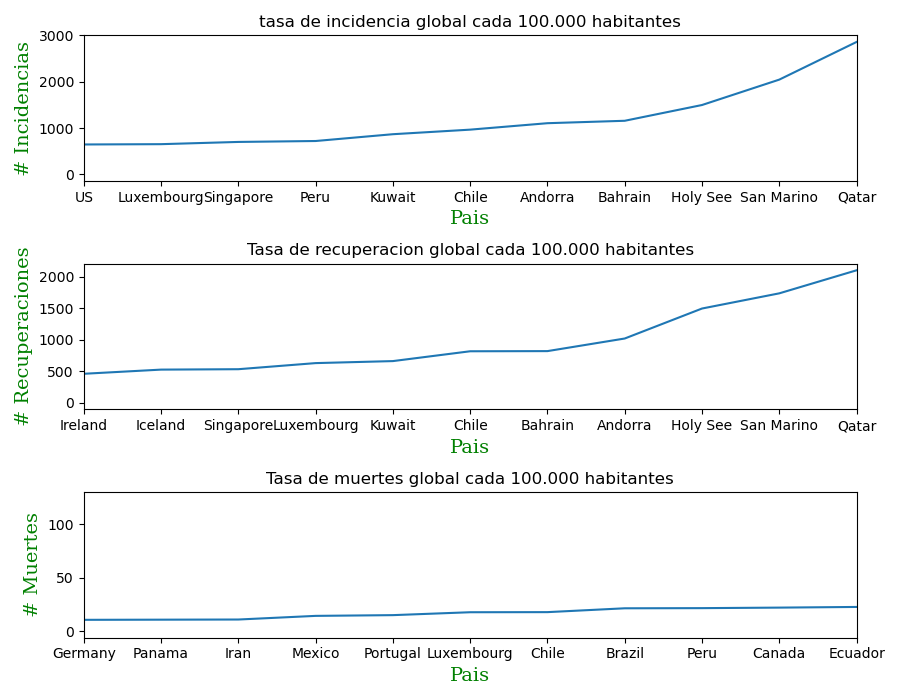

In [184]:
fig, ax = plt.subplots(nrows= 3 ,ncols = 1, figsize=(9, 7), tight_layout=True, facecolor='w');
ax[0].cla()
ax[0].set_title('tasa de incidencia global cada 100.000 habitantes');
ax[0].plot(tasa_incidencia);
ax[0].set_xlim([167,177]);
ax[0].set_ylabel('# Incidencias', fontsize=14, fontname='serif', color="green");
ax[0].set_xlabel('Pais', fontsize=14, fontname='serif', color="green");
ax[1].cla()
ax[1].set_title('Tasa de recuperacion global cada 100.000 habitantes');
ax[1].plot(tasa_recu);
ax[1].set_xlim([167,177]);
ax[1].set_ylabel('# Recuperaciones', fontsize=14, fontname='serif', color="green");
ax[1].set_xlabel('Pais', fontsize=14, fontname='serif', color="green");
ax[2].cla()
ax[2].set_title('Tasa de muertes global cada 100.000 habitantes');
ax[2].plot(tasa_muertes);
ax[2].set_xlim([155,165]);
ax[2].set_ylabel('# Muertes', fontsize=14, fontname='serif', color="green");
ax[2].set_xlabel('Pais', fontsize=14, fontname='serif', color="green");

de lo anterior se puede ver que nuestra tasa de incidencia cada 100.000 habitantes es muy parecida a la de Kuwait Y Andorra

In [185]:
print('Tasa incidencia cada 100.000 habitantes: ',tasa_incidencia.loc['Chile'])
print('Tasa incidencia cada 100.000 habitantes: ',tasa_recu.loc['Chile'])
print('Tasa Muertes cada 100.000 habitantes: ',tasa_muertes.loc['Chile'])

Tasa incidencia cada 100.000 habitantes:  966.5717889257785
Tasa incidencia cada 100.000 habitantes:  818.7056786832795
Tasa Muertes cada 100.000 habitantes:  17.728002656213416


## Análisis comparativo (2.5pt)

Construya una interfaz gráfica usando `ipywidgets` y `matplotlib`

- La interfaz debe incluir dos controles para escoger dos paises entre los paises pertenecientes a la [OCDE](https://es.wikipedia.org/wiki/Organizaci%C3%B3n_para_la_Cooperaci%C3%B3n_y_el_Desarrollo_Econ%C3%B3micos)
- La interfaz debe mostrar tres gráficos con la evolución temporal de casos confirmados, recuperados y decesos en ambos paises 
- La interfaz debe tener un control que permita escoger entre valores totales acumulados, valores totales diarios y tasas por 100.000 habitantes


En base a su interfaz estudie el caso de Chile contra dos paises de la OCDE seleccionados por usted y comente sobre lo que observa

In [374]:
def f(pais_1, pais_2,control):
    ax[0].cla()
    ax[0].plot(df_covidconf_mundial.loc[pais_1][1:-1], c = 'green', label = pais_1);
    ax[0].plot(df_covidconf_mundial.loc[pais_2][1:-1], label = pais_2);
    ax[0].set_title('Comparacion de paises Casos Confirmados')
    ax[0].legend(loc=2, ncol=3)
    ax[0].set_xticks(['1/22/20','2/22/20','3/22/20','4/22/20','5/22/20','6/16/20']);
    ax[1].cla()
    ax[1].plot(df_covidrecu_mundial.loc[pais_1][1:-1], c = 'green', label = pais_1);
    ax[1].plot(df_covidrecu_mundial.loc[pais_2][1:-1], label = pais_2);
    ax[1].set_title('Comparacion de paises Casos Recuperados')
    ax[1].legend(loc=2, ncol=3)
    ax[1].set_xticks(['1/22/20','2/22/20','3/22/20','4/22/20','5/22/20','6/16/20']);
    ax[2].cla()
    ax[2].plot(df_covidmuerte_mundial.loc[pais_1][1:-1], c = 'green', label = pais_1);
    ax[2].plot(df_covidmuerte_mundial.loc[pais_2][1:-1], label = pais_2);
    ax[2].set_title('Comparacion de paises Casos de Muertes')
    ax[2].set_xticks(['1/22/20','2/22/20','3/22/20','4/22/20','5/22/20','6/16/20']);
    ax[2].legend(loc=2, ncol=3)
    if(control == 'Valores Totales Acomulados'):
        ax[3].cla()
        ax[3].set_title(control + ' Confirmados entre '+ pais_1 + ' y ' + pais_2);
        ax[3].bar(x=[pais_1,pais_2], height=[df_covidconf_mundial[df_covidconf_mundial.index == pais_1]['Total'][0],
                                            df_covidconf_mundial[df_covidconf_mundial.index == pais_2]['Total'][0]])
        ax[4].cla()
        ax[4].set_title(control + ' Recuperados entre '+ pais_1 + ' y ' + pais_2);
        ax[4].bar(x=[pais_1,pais_2], height=[df_covidrecu_mundial[df_covidrecu_mundial.index == pais_1]['Total'][0],
                                            df_covidrecu_mundial[df_covidrecu_mundial.index == pais_2]['Total'][0]])
        ax[5].cla()
        ax[5].set_title(control + 'Muertes entre '+ pais_1 + ' y ' + pais_2);
        ax[5].bar(x=[pais_1,pais_2], height=[df_covidmuerte_mundial[df_covidmuerte_mundial.index == pais_1]['Total'][0],
                                            df_covidmuerte_mundial[df_covidmuerte_mundial.index == pais_2]['Total'][0]])
    if(control == 'Valores Totales Diarios'):
        ax[3].cla()
        ax[3].set_title(control + ' Confirmados entre '+ pais_1 + ' y ' + pais_2);
        ax[3].plot(df_covidconf_mundial.loc[['Chile','US']][df_covidconf_mundial.columns[1:-1]].sum())
        ax[3].set_xticks(['1/22/20','2/22/20','3/22/20','4/22/20','5/22/20','6/16/20']);
        ax[4].cla()
        ax[4].set_title(control + ' Recuperados entre '+ pais_1 + ' y ' + pais_2);
        ax[4].plot(df_covidrecu_mundial.loc[['Chile','US']][df_covidrecu_mundial.columns[1:-1]].sum())
        ax[4].set_xticks(['1/22/20','2/22/20','3/22/20','4/22/20','5/22/20','6/16/20']);
        ax[5].cla()
        ax[5].set_title(control + ' Muertes entre '+ pais_1 + ' y ' + pais_2);
        ax[5].plot(df_covidmuerte_mundial.loc[['Chile','US']][df_covidmuerte_mundial.columns[1:-1]].sum())
        ax[5].set_xticks(['1/22/20','2/22/20','3/22/20','4/22/20','5/22/20','6/16/20']);
    if(control == 'Tasa por cada 100.000 habitantes'):
        ax[3].cla()
        ax[3].set_title(control + ' Confirmados entre '+ pais_1 + ' y ' + pais_2);
        ax[3].bar(x=[pais_1,pais_2], height=[tasa_incidencia.loc[pais_1],tasa_incidencia.loc[pais_2]])
        ax[4].cla()
        ax[4].set_title(control + ' Recuperados entre '+ pais_1 + ' y ' + pais_2);
        ax[4].bar(x=[pais_1,pais_2], height=[tasa_recu.loc[pais_1],tasa_recu.loc[pais_2]])
        ax[5].cla()
        ax[5].set_title(control + ' Recuperados entre '+ pais_1 + ' y ' + pais_2);
        ax[5].bar(x=[pais_1,pais_2], height=[tasa_muertes.loc[pais_1],tasa_muertes.loc[pais_2]])

In [375]:
OCDE = ['Canada', 'US', 'United Kingdom', 'Denmark','Iceland','Norway','Turkey','Spain','Portugal','France',
        'Ireland','Belgium','Germany','Greece','Sweden','Switzerland','Austria','Netherlands','Luxembourg','Italy','Japan',
        'Finland','Australia','New Zealand','Mexico','Hungary','Poland','Slovakia','Chile','Eslovenia','Israel','Estonia',
        'Latvia','Lithuania','Colombia']

interactive(children=(Dropdown(description='pais_1', options=('Canada', 'US', 'United Kingdom', 'Denmark', 'Ic…

<IPython.core.display.Javascript object>


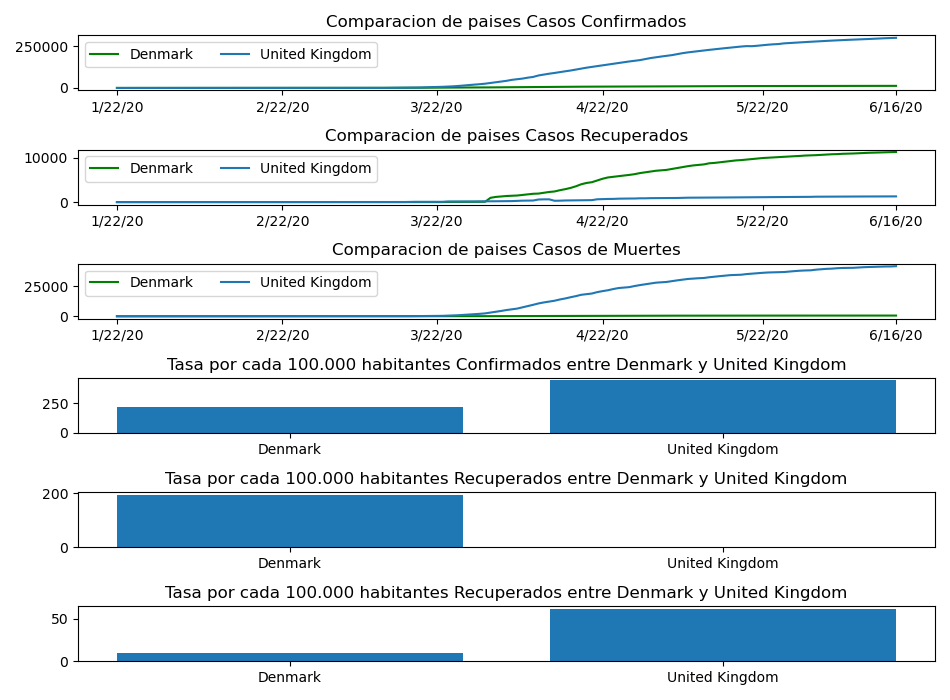

In [376]:
interact(f, pais_1=OCDE, pais_2=OCDE, control = ['Valores Totales Acomulados', 'Valores Totales Diarios', 'Tasa por cada 100.000 habitantes']);
fig, ax = plt.subplots(nrows= 6 ,ncols = 1, figsize=(9.5, 7), tight_layout=True, facecolor='w');
ax[0].set_title('Comparacion de paises Casos Confirmados');
ax[1].set_title('Comparacion de paises Casos Recuperados');
ax[2].set_title('Comparacion de paises Casos de Muertes');

## BONUS (Opcional)

Implemente una app web a partir de su interfaz desarrollada en el punto anterior en base a jupyter widgets usando [viola](https://github.com/voila-dashboards/voila) y [heroku](https://github.com/voila-dashboards/voila-heroku)

Escriba acá el link a su app web